In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)

# Prediction: Get min distance index (Nearest neighbor)
pred = tf.argmin(distance, 0)
print(pred)
accuracy = 0.

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Tensor("ArgMin_2:0", shape=(), dtype=int64)


In [5]:
tf.reduce_sum?

In [45]:

# Start training
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print ("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print ("Done!")
    print ("Accuracy:", accuracy)

Test 0 Prediction: 4 True Class: 4
Test 1 Prediction: 2 True Class: 2
Test 2 Prediction: 7 True Class: 7
Test 3 Prediction: 1 True Class: 1
Test 4 Prediction: 0 True Class: 8
Test 5 Prediction: 9 True Class: 9
Test 6 Prediction: 5 True Class: 8
Test 7 Prediction: 6 True Class: 6
Test 8 Prediction: 7 True Class: 7
Test 9 Prediction: 1 True Class: 1
Test 10 Prediction: 7 True Class: 7
Test 11 Prediction: 9 True Class: 7
Test 12 Prediction: 8 True Class: 8
Test 13 Prediction: 8 True Class: 8
Test 14 Prediction: 1 True Class: 1
Test 15 Prediction: 6 True Class: 6
Test 16 Prediction: 3 True Class: 3
Test 17 Prediction: 4 True Class: 4
Test 18 Prediction: 5 True Class: 5
Test 19 Prediction: 7 True Class: 7
Test 20 Prediction: 7 True Class: 7
Test 21 Prediction: 0 True Class: 0
Test 22 Prediction: 9 True Class: 9
Test 23 Prediction: 9 True Class: 9
Test 24 Prediction: 8 True Class: 8
Test 25 Prediction: 4 True Class: 4
Test 26 Prediction: 7 True Class: 7
Test 27 Prediction: 8 True Class: 8
Te

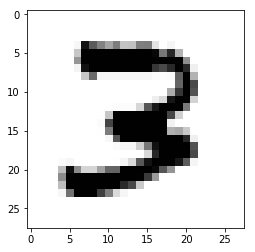

In [87]:
#Collect one image
image1_ = Xtr[2]

#print image
import PIL
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(image1_.reshape((28,28)), cmap='Greys')


In [93]:
tf.train.



TypeError: gradients() missing 1 required positional argument: 'xs'

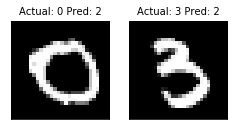

In [46]:
#Plotting samples
#%matplotlib inline
# Plot the last batch results:
#actuals = np.argmax(y_batch, axis=1)

#Nrows = 2
#Ncols = 3
#for i in range(len(actuals)):
 #   plt.subplot(Nrows, Ncols, i+1)
  #  plt.imshow(np.reshape(x_batch[i], [28,28]), cmap='Greys_r')
   # plt.title('Actual: ' + str(actuals[i]) + ' Pred: ' + str(predictions[i]),
    #                           fontsize=10)
   # frame = plt.gca()
   # frame.axes.get_xaxis().set_visible(False)
   # frame.axes.get_yaxis().set_visible(False)